# Analysis on Global Financial development Dataset

By Madhurika Situt



Background –

The Global Financial Development Database is an extensive dataset of financial system characteristics for 214 economies.


Data Source-

This data set is downloaded from  https://datacatalog.worldbank.org/dataset/global-financial-development
This data contains financial report of 214 economies from 1960 to 2017.

The database includes measures of

•	Size of financial institutions and markets (financial depth)
•	Degree to which individuals can and do use financial services (access)
•	Efficiency of financial intermediaries and markets in intermediating resources and facilitating financial transactions    (efficiency)
•	Stability of financial institutions and markets (stability).

CSV files 

•	GFDDCountry.csv
•	GFDDCountry-Series.csv
•	GFDDData.csv (around 25000 rows and around 60 column)
•	GFDDFootNote.csv
•	GFDDSeries.csv



Goal of analysis –

Here, I am presenting some analysis on this dataset. such as-

•	Minimum and Maximum gross income in all economies and represent it in matplotlib.basemap.

•	Increase in population across places from different economies and represent it in plotly timeseries.

•   What are the categories(Series.Topic) and different indicators it contains and carry out in excel.

•	Carry out Bank return on assets and equity (before and after tax ) for and represent it in stacked bar graph.

•	Top 5 economic countries that has the highest GDP market prices adn represent it in timeseries.



## Loading libraries

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import plotly.graph_objects as go
from mpl_toolkits.basemap import Basemap
%matplotlib inline


## Loading dataset

In [2]:
#Loading dataset using openpyxl to get sheetnames
wb = openpyxl.load_workbook('GFDD.xlsx')
wb.sheetnames

['Data', 'Country', 'Series', 'Country-Series', 'FootNote']

In [3]:
#carrying out each sheet file in different dataframes manually

xls = pd.ExcelFile('GFDD.xlsx')
df_data = pd.read_excel(xls, 'Data')
df_country = pd.read_excel(xls, 'Country')
df_series = pd.read_excel(xls, 'Series')
df_country_series = pd.read_excel(xls, 'Country-Series')
df_footnote = pd.read_excel(xls, 'FootNote')

#Carrying out rows and columns all dataframes
print("Rows and Columns\n")
print("\ndf_data shape :", df_data.shape)
print("\ndf_country shape :", df_country.shape)
print("\ndf_series shape :", df_series.shape)
print("\ndf_country_series shape :", df_country_series.shape)
print("\ndf_footnote shape :", df_footnote.shape)

#carrying out column names for all dataframes
print("Column names\n")
print("\ndf_data shape :", df_data.columns)
print("\ndf_country shape :", df_country.columns)
print("\ndf_series shape :", df_series.columns)
print("\ndf_country_series shape :", df_country_series.columns)
print("\ndf_footnote shape :", df_footnote.columns)




Rows and Columns


df_data shape : (25038, 62)

df_country shape : (214, 30)

df_series shape : (117, 20)

df_country_series shape : (224, 3)

df_footnote shape : (292, 4)
Column names


df_data shape : Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

df_country shape : Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
      

In [4]:
#Carrying out unique indicator name
print("Number of unique indicators:",df_data['Indicator Name'].nunique())
#print(df_data['Indicator Name'].unique())

Number of unique indicators: 117


Here we are performing analysis using some of the indicators. so carrying out specific list of indicators into new dataframe

In [5]:
#creating list of indicators what are required for analysis
list_indicators=['5-bank asset concentration',
'Account used for business purposes (% age 15+)',
'ATMs per 100,000 adults',
'Bank accounts per 1,000 adults',
'Bank branches per 100,000 adults',
'Bank concentration (%)',
'Bank cost to income ratio (%)',
'Bank credit to bank deposits (%)',
'Bank deposits to GDP (%)',
'Bank net interest margin (%)',
'Bank return on assets (%, after tax)',
'Bank return on assets (%, before tax)',
'Bank return on equity (%, after tax)',
'Bank return on equity (%, before tax)',
'Consumer price index (2010=100, average)',
'GDP at market prices (current US$)',
'Gross National Income (current US$)',
'Population, total']

#Carrying out specifics rows which have indicator names present in list_indicators
df_data_v1=pd.DataFrame(df_data.loc[df_data['Indicator Name'].isin(list_indicators)])
#resetting index
df_data_v1=df_data_v1.reset_index(drop=True)
df_data_v1.shape


(3852, 62)

Cross check number of rows value between (df_data_v1) and by filtering in excel file manually.

Number of rows in dataframe df_data_v1 = 3852
Number of rows in excel file = 3852

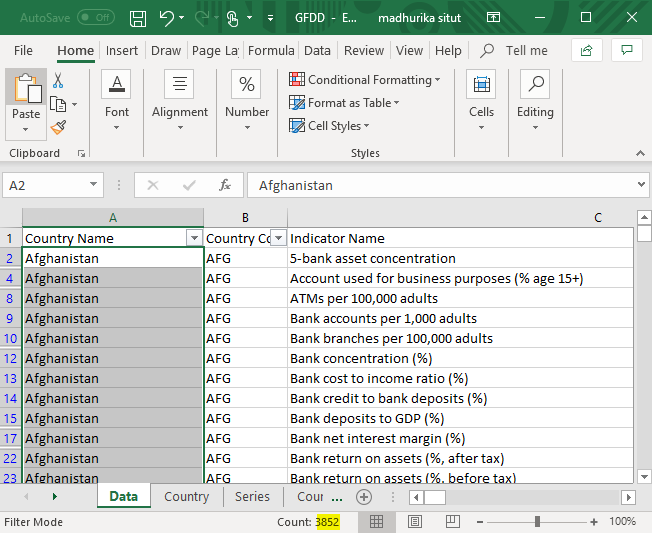

This is required to cross check if you haven't missed any indicator list.

## Data cleaning check

Here we are using df_data and df_series dataframe to analysis. So we are checking if these two dataframes are clean or not.

In [6]:
#Checking datafram info
print("df_data info-\n", df_data_v1.info())
print("============================")
print("df_series info-\n", df_series.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 62 columns):
Country Name      3852 non-null object
Country Code      3852 non-null object
Indicator Name    3852 non-null object
Indicator Code    3852 non-null object
1960              55 non-null float64
1961              55 non-null float64
1962              57 non-null float64
1963              57 non-null float64
1964              63 non-null float64
1965              67 non-null float64
1966              69 non-null float64
1967              69 non-null float64
1968              69 non-null float64
1969              71 non-null float64
1970              71 non-null float64
1971              71 non-null float64
1972              71 non-null float64
1973              73 non-null float64
1974              76 non-null float64
1975              80 non-null float64
1976              84 non-null float64
1977              87 non-null float64
1978              87 non-null float64
1979           

We can check for the null values from seaborn heatmap as well.

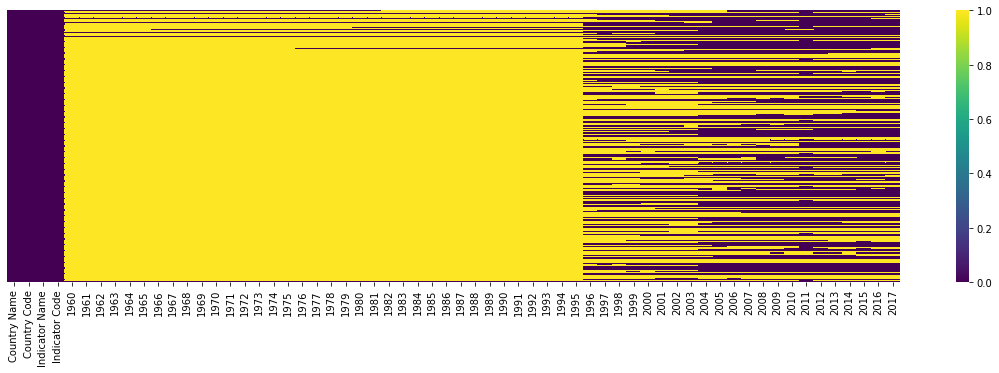

In [7]:
#Checking for null values in df_data
df_data_v1.isnull().sum()
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_data_v1.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

Dropping columns "1960" to "1995" as these columns have lease data to analyze

In [8]:
#Dropping columns
print("Columns which we are dropping:\n",df_data_v1.columns[range(4,40)])
df_data_v1=df_data_v1.drop(df_data_v1.columns[range(3,40)],axis=1)
df_data_v1.columns

Columns which we are dropping:
 Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995'],
      dtype='object')


Index(['Country Name', 'Country Code', 'Indicator Name', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

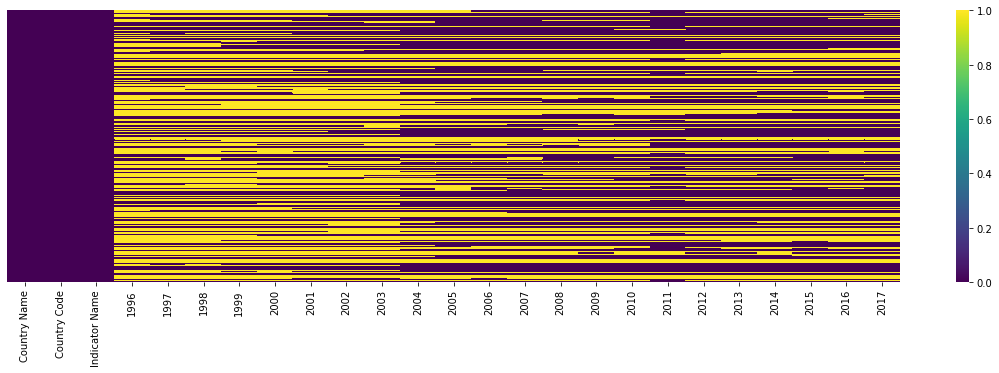

In [9]:
#Checking for null values in df_data_v1
df_data_v1.isnull().sum()
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_data_v1.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

We find here are lots of null values. but we are not filling the null values now. we will carry out the rows and columns into separate dataframe and will clean the data separately.

## Analysis 1:  Minimum and Maximum gross income in all economies and represent it in matplotlib.basemap

In [10]:
#Creatng 2 lists
list_economy=[]
list_indicator_name=[]                                    #temporary list to carry out list of indicator name which matches string1
string1='Gross National Income (current US$)'
#Renaming first 4 column names in df_data_v1
df_data_v1=df_data_v1.rename(columns = {'Country Name':'Country_Name','Country Code':'Country_Code','Indicator Name':'Indicator_Name','Indicator Code':'Indicator_Code'})
#creating list that carries all 214 economies
list_economy.append(list(df_data_v1.Country_Name.unique()))
list_economy=[item for sublist in list_economy for item in sublist]
list_economy

for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string1:
        list_indicator_name.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string1])
            
            
df_data_GNI=pd.DataFrame(list_indicator_name[0])
df_data_GNI=df_data_GNI.reset_index(drop=True)
df_data_GNI.head()

Country_Name Country_Code                       Indicator_Name  \
0  Afghanistan          AFG  Gross National Income (current US$)   
1      Albania          ALB  Gross National Income (current US$)   
2      Algeria          DZA  Gross National Income (current US$)   
3      Andorra          AND  Gross National Income (current US$)   
4       Angola          AGO  Gross National Income (current US$)   

           1996          1997          1998          1999          2000  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2  4.400000e+10  4.600000e+10  4.600000e+10  4.600000e+10  5.200000e+10   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

           2001          2002  ...          2008          2009          2010  \
0  2.500000e+09  4.100000e+09  ...  1.000000e+10  1.200000e+10  1.600000e+10   
1           NaN           NaN  ...  1.300000e+10  1.200000e+10  1.200000e+10   
2  5.300000e+10  5.500000e+10  ...  1.700000e+11  1.400000e+11  1.600000e+11   
3           NaN           NaN  ...           NaN           NaN           NaN   
4           NaN  1.400000e+10  ...  7.500000e+10  6.300000e+10  7.600000e+10   

           2011          2012          2013          2014          2015  \
0  1.800000e+10  2.000000e+10  2.100000e+10  2.000000e+10  2.000000e+10   
1  1.300000e+10  1.200000e+10  1.300000e+10  1.300000e+10  1.200000e+10   
2  2.000000e+11  2.100000e+11  2.100000e+11  2.100000e+11  1.600000e+11   
3           NaN           NaN           NaN           NaN           NaN   
4  1.000000e+11  1.200000e+11  1.300000e+11  1.400000e+11  1.100000e+11   

           2016          2017  
0  1.900000e+10  2.000000e+10  
1  1.200000e+10  1.300000e+10  
2  1.600000e+11  1.600000e+11  
3           NaN           NaN  
4  9.600000e+10  1.200000e+11  

[5 rows x 25 columns]

Cleaning the dataframe df_data_GNI to analysis further on "Minimum and Maximum gross income in all economies"

Total NaN in Dataframe
1834
***Count NaN in each column of a DataFrame***
Nan in each columns
Country_Name        0
Country_Code        0
Indicator_Name      0
1996              111
1997              104
1998              104
1999              102
2000               98
2001               94
2002               92
2003               94
2004               86
2005               81
2006               76
2007               74
2008               75
2009               74
2010               75
2011               70
2012               69
2013               71
2014               72
2015               68
2016               75
2017               69
dtype: int64
***Count NaN in each row of a DataFrame***
Nan in row  0  :  5
Nan in row  1  :  10
Nan in row  2  :  0
Nan in row  3  :  22
Nan in row  4  :  6
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  2
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14

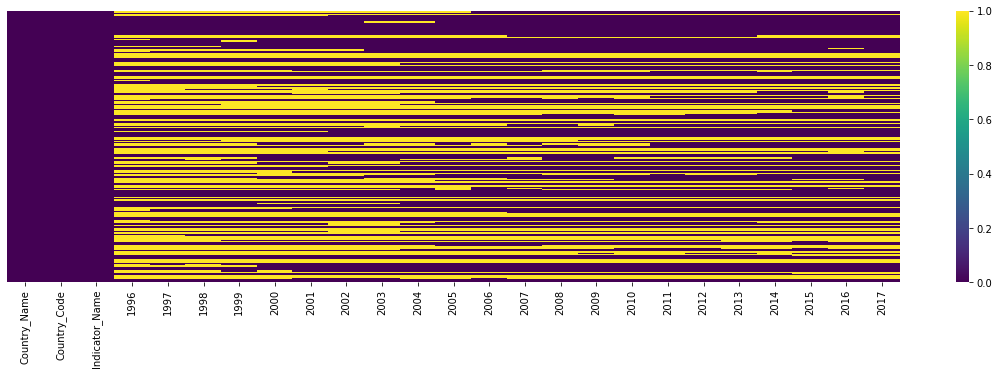

In [11]:
#Checking for null values in df_data
print("Total NaN in Dataframe" , df_data_GNI.isnull().sum().sum(), sep='\n') 
print("***Count NaN in each column of a DataFrame***")
print("Nan in each columns" , df_data_GNI.isnull().sum(), sep='\n')
print("***Count NaN in each row of a DataFrame***")
for i in range(len(df_data_GNI.index)) :
    print("Nan in row ", i , " : " ,  df_data_GNI.iloc[i].isnull().sum())

fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_data_GNI.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

It seems, we have huge number of null values present in some rows. So, we will drop those rows which have completely null values and and fill the null values in rest of the rows with mean values (row-wise).

Transposing the dataframe to check how many rows have completely null values for cell from '1996' to '2017' and dropping those

In [12]:
#Dropping rows
temp_li=df_data_GNI.columns[range(3,25)]
df_data_GNI=df_data_GNI.dropna(how='all',subset=temp_li)
print("Number of null rows\n",(df_data_GNI.T).isnull().sum())

Number of null rows
 0       5
1      10
2       0
4       6
5       0
6       0
7       0
8       0
9       2
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20     15
22      0
23      1
24      1
25      0
26      0
27      0
28      3
29      0
30      1
31      7
       ..
168     2
170     0
171     0
174     2
176     0
177     2
181     8
182    21
183     0
184     0
185    19
187    18
188     8
189     0
191    16
193     3
194     0
195     0
199     0
200     2
201     4
202     0
203     0
204     0
205     4
207     3
208     0
211    18
212     0
213     0
Length: 157, dtype: int64


Now to fill the values in null cells. we will be carrying out row average into new column 'mean' . This will be used to fill the null values.
Why mean? because this won't change the row average of each economy.

In [13]:
df_data_GNI['Mean']=df_data_GNI[df_data_GNI.columns[range(3,25)]].mean(axis=1)
list_mean=[]
list_mean=list(df_data_GNI['Mean'])
#list_mean=[ '%.2f' % elem for elem in list_mean]
len(list_mean)
#Filling null values with corresponding mean values row wise
for i in range(df_data_GNI.shape[0]):
    df_data_GNI.iloc[i]=df_data_GNI.iloc[i].fillna(list_mean[i])


Country_Name      0
Country_Code      0
Indicator_Name    0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
Mean              0
dtype: int64


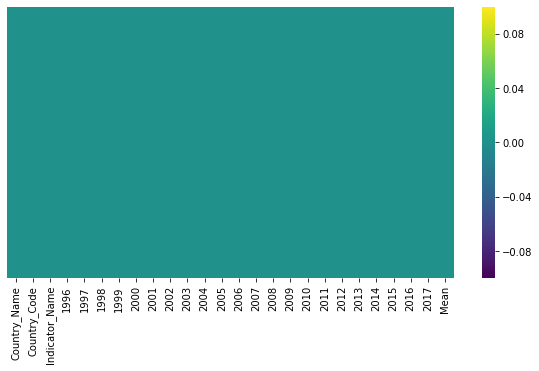

In [14]:
# Checking for null values
print(df_data_GNI.isnull().sum())

#Plotting heat map representing null values if any
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(df_data_GNI.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

Now df_data_GNI data is cleaned. We will proceed further with first analysis- Minimum and Maximum gross income in all economies

In [15]:
list_min_GNI=[]
list_min_year=[]
list_max_GNI=[]
list_max_year=[]
list_economy_GNI=[]
list_min_GNI=list(df_data_GNI.iloc[:, 3:25].min(axis=1))
list_max_GNI=list(df_data_GNI.iloc[:, 3:25].max(axis=1))
list_economy_GNI=list(df_data_GNI.Country_Name)


#carrying out min and max year for each economy
#for i in range(df_data_GNI.shape[0]):
#    list_min_year.append(df_data_GNI.columns[(df_data_GNI == list_min_GNI[i]).iloc[i]].values)
#    list_max_year.append(df_data_GNI.columns[(df_data_GNI == list_max_GNI[i]).iloc[i]].values)


#carrying out 4 columns to display min GNI ,max GNI, year for min GNI and year for max GNI.
df_data_GNI['Min_GNI']=list_min_GNI
df_data_GNI['Max_GNI']=list_max_GNI


df_data_GNI[['Min_GNI','Max_GNI']].head()

Min_GNI       Max_GNI
0  2.500000e+09  2.100000e+10
1  9.200000e+09  1.300000e+10
2  4.400000e+10  2.100000e+11
4  1.400000e+10  1.400000e+11
5  6.100000e+08  1.400000e+09

In [16]:
#plotting in bar graph
fig = go.Figure(data=[
    go.Bar(name='Minimum GNI', x=list_economy_GNI, y=list_min_GNI),
    go.Bar(name='Maximum GNI', x=list_economy_GNI, y=list_max_GNI)
])
# Change the bar mode
fig.update_layout(barmode='group',title_text='Minimum and Maximum gross income in all economic countries',autosize=False,width=1000,height=600)
fig.show()

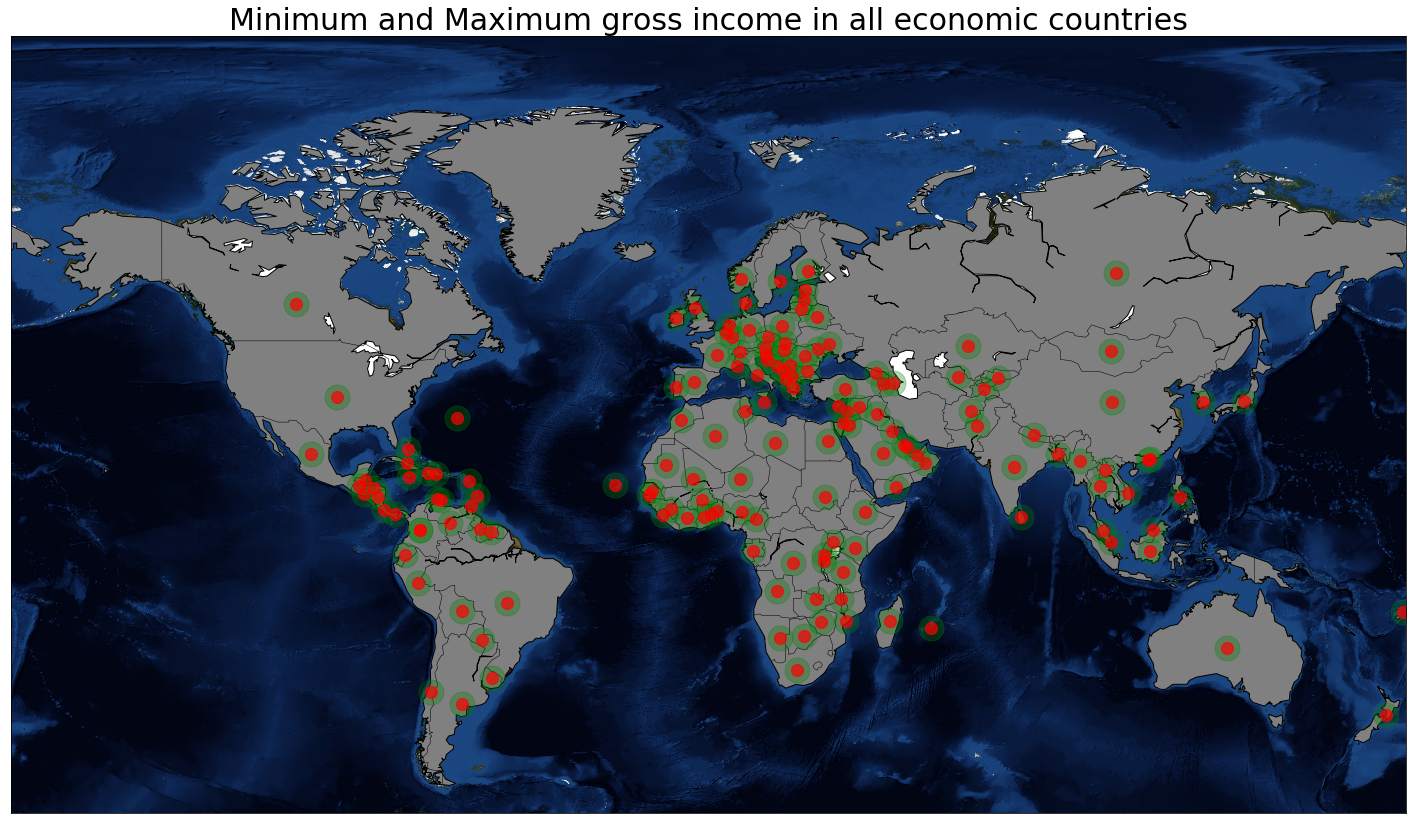

In [17]:
#Plotting basemap
plt.figure(figsize=(25,25))
m= Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
          llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawrivers()
m.fillcontinents(color='grey', lake_color='#FFFFFF')
#m.drawmapboundary(fill_color='#A6CAE0')

#Carrying out latitudes of all economies present in df_data_GNI manually.
lat=[33.93911,41.153332,28.033886,-11.202692,17.060816,-38.416097,40.069099,12.52111,
-25.274398,47.516231,40.143105,25.03428,25.930414,23.684994,13.193887,53.709807,
50.503887,17.189877,9.30769,32.321384,-16.290154,43.915886,-22.328474,-14.235004,
4.535277,42.733883,12.238333,-3.373056,16.002082,4.570868,7.369722,56.130366,
-35.675147,35.86166,4.570868,-4.038333,9.748917,7.539989,45.1,21.521757,12.226079,
35.126413,49.817492,56.26392,18.735693,-1.831239,26.820553,13.794185,58.595272,
9.145,-16.578193,61.92411,46.227638,-0.803689,13.443182,42.315407,51.165691,
7.946527,39.074208,15.783471,9.945587,4.860416,18.971187,15.199999,22.396428,
47.162494,20.593684,-0.789275,33.223191,53.41291,31.046051,41.87194,18.109581,
36.204824,30.585164,48.019573,-0.023559,35.907757,29.31166,41.20438,19.85627,
56.879635,33.854721,26.3351,55.169438,49.815273,22.198745,-18.766947,-13.254308,
4.210484,17.570692,35.937496,21.00789,-20.348404,23.634501,47.411631,43.750298,
46.862496,42.708678,31.791702,-18.665695,21.913965,-22.95764,28.394857,52.132633,
-40.900557,12.865416,17.607789,9.081999,41.608635,60.472024,21.512583,30.375321,
8.537981,-23.442503,-9.189967,12.879721,51.919438,39.399872,25.354826,45.943161,
61.52401,-1.940278,23.885942,14.497401,44.016521,8.460555,1.352083,48.669026,
46.151241,-30.559482,40.463667,7.873054,12.862807,3.919305,60.128161,46.818188,
34.802075,38.861034,-6.369028,15.870032,8.619543,10.691803,33.886917,38.963745,
1.373333,48.379433,23.424076,55.378051,37.09024,-32.522779,41.377491,6.42375,
14.058324,15.552727,-13.133897,-19.015438]

#Carrying out longitudes of all economies present in df_data_GNI manually

lon=[67.709953,20.168331,1.659626,17.873887,-61.796428,-63.616672,45.038189,-69.968338,133.775136,14.550072,47.576927,
-77.39628,50.637772,90.356331,-59.543198,27.953389,4.469936,-88.49765,2.315834,-64.75737,-63.588653,17.679076,
24.684866,-51.92528,114.727669,25.48583,-1.561593,29.918886,-24.013197,-74.297333,12.354722,-106.346771,-71.542969,
104.195397,-74.297333,21.758664,-83.753428,-5.54708,15.2,-77.781167,-69.060087,33.429859,15.472962,9.501785,
-70.162651,-78.183406,30.802498,-88.89653,25.013607,40.489673,179.414413,25.748151,2.213749,11.609444,-15.310139,
43.356892,10.451526,-1.023194,21.824312,-90.230759,-9.696645,-58.93018,-72.285215,-86.241905,114.109497,19.503304,
78.96288,113.921327,43.679291,-8.24389,34.851612,12.56738,-77.297508,138.252924,36.238414,66.923684,37.906193,
127.766922,47.481766,74.766098,102.495496,24.603189,35.862285,17.228331,23.881275,6.129583,113.543873,46.869107,
34.301525,101.975766,-3.996166,14.375416,-10.940835,57.552152,-102.552784,28.369885,7.412841,103.846656,19.37439,
-7.09262,35.529562,95.956223,18.49041,84.124008,5.291266,174.885971,-85.207229,8.081666,8.675277,21.745275,8.468946,
55.923255,69.345116,-80.782127,-58.443832,-75.015152,121.774017,19.145136,-8.224454,51.183884,24.96676,105.318756,
29.873888,45.079162,-14.452362,21.005859,-11.779889,103.819836,19.699024,14.995463,22.937506,-3.74922,80.771797,
30.217636,-56.027783,18.643501,8.227512,38.996815,71.276093,34.888822,100.992541,0.824782,-61.222503,9.537499,
35.243322,32.290275,31.16558,53.847818,-3.435973,-95.712891,-55.765835,64.585262,-66.58973,108.277199,48.516388,
27.849332,29.154857]


x,y=m(lon,lat)
m.plot(x,y,'go',markersize=25,alpha=.3)
m.plot(x,y,'ro',markersize=12,alpha=.7)
m.bluemarble()
labels = df_data_GNI.Country_Name.values 
for label, xpt, ypt in zip(labels, lon, lat):
    plt.annotate(label, xy=m(xpt, ypt), xycoords="data", backgroundcolor="w",
                 xytext=(1,1), textcoords='offset points').set_visible(False)
        
        

mplcursors.cursor(hover=True)
plt.title('Minimum and Maximum gross income in all economic countries',fontsize= 30)
plt.show()


## Analysis 2:  Increase in population across places from different economies and represent it in plotly timeseries.

In [18]:
# Carrying out data into new dataframe df_data_pop that is required for analysis
string2='Population, total'
list_pop=[]                      # list carrying rows that have population,total value
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string2:
        list_pop.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string2])
            
            
df_data_pop=pd.DataFrame(list_pop[0])
df_data_pop=df_data_pop.reset_index(drop=True)
df_data_pop.shape

(214, 25)

### Data clean check for df_data_pop

Total NaN in Dataframe
1740
***Count NaN in each column of a DataFrame***
Nan in each columns
Country_Name        0
Country_Code        0
Indicator_Name      0
1996              105
1997               98
1998               99
1999               96
2000               94
2001               90
2002               88
2003               90
2004               82
2005               76
2006               71
2007               71
2008               71
2009               69
2010               70
2011               66
2012               65
2013               69
2014               69
2015               64
2016               71
2017               66
dtype: int64
***Count NaN in each row of a DataFrame***
Nan in row  0  :  0
Nan in row  1  :  10
Nan in row  2  :  0
Nan in row  3  :  2
Nan in row  4  :  6
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  0
Nan in row  9  :  2
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14 

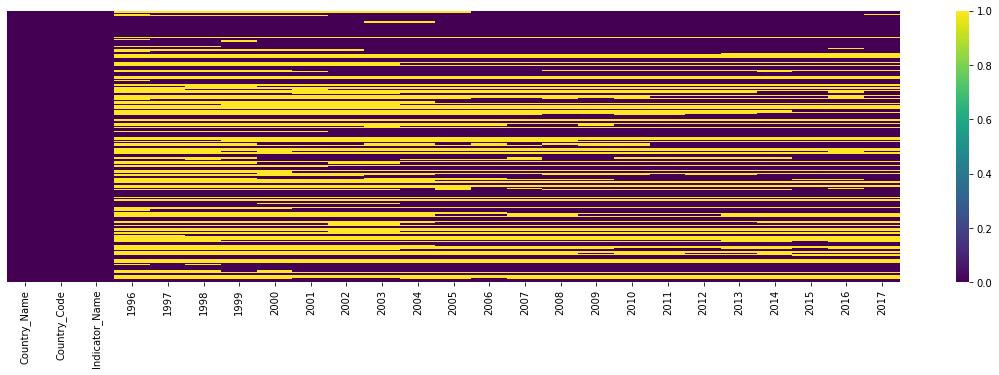

In [19]:
#Checking for null values in df_data
print("Total NaN in Dataframe" , df_data_pop.isnull().sum().sum(), sep='\n') 
print("***Count NaN in each column of a DataFrame***")
print("Nan in each columns" , df_data_pop.isnull().sum(), sep='\n')
print("***Count NaN in each row of a DataFrame***")
for i in range(len(df_data_pop.index)) :
    print("Nan in row ", i , " : " ,  df_data_pop.iloc[i].isnull().sum())

fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_data_pop.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

It seems, we have huge number of null values present in some columns and some rows. So, we will drop those columns and rows and will perform on the analysis on rest of the data.

In [20]:
#Dropping columns
print("Columns which we are dropping:\n",df_data_pop.columns[range(1,3)])
df_data_pop=df_data_pop.drop(df_data_pop.columns[range(1,3)],axis=1)
df_data_pop.columns

Columns which we are dropping:
 Index(['Country_Code', 'Indicator_Name'], dtype='object')


Index(['Country_Name', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [21]:
#Dropping rows
temp_li=df_data_pop.columns[range(1,23)]
df_data_pop=df_data_pop.dropna(how='all',subset=temp_li)
print("Number of null rows\n",(df_data_pop.T).isnull().sum())

Number of null rows
 0       0
1      10
2       0
3       2
4       6
5       0
6       0
7       0
8       0
9       2
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
22      0
23      1
24      1
25      0
26      0
27      0
28      3
29      0
30      1
       ..
168     2
170     0
171     0
174     2
176     0
177     2
181     8
182    21
183     0
184     0
185     9
187    18
188     8
189     0
191    16
193     3
194     0
195     0
199     0
200     2
201     0
202     0
203     0
204     0
205     4
207     0
208     0
211    18
212     0
213     0
Length: 160, dtype: int64


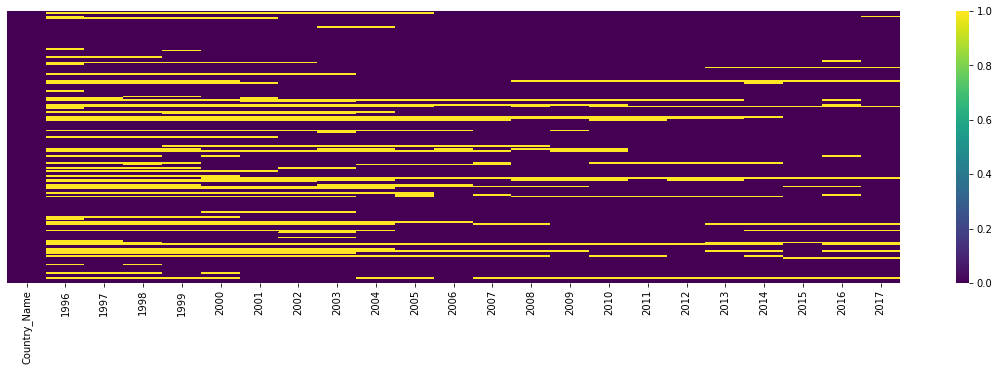

In [22]:
#Displying null values
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_data_pop.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

Now to fill the values in null cells. we will be carrying out row average into new column 'mean' . This will be used to fill the null values.
Why mean? because this won't change the row average of each economy.

In [23]:
df_data_pop['Mean']=df_data_pop[df_data_pop.columns[range(1,23)]].mean(axis=1)
list_mean=[]
list_mean=list(df_data_pop['Mean'])
#list_mean=[ '%.2f' % elem for elem in list_mean]
len(list_mean)
#Filling null values with corresponding mean values row wise
for i in range(df_data_pop.shape[0]):
    df_data_pop.iloc[i]=df_data_pop.iloc[i].fillna(list_mean[i])


Country_Name    0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
Mean            0
dtype: int64


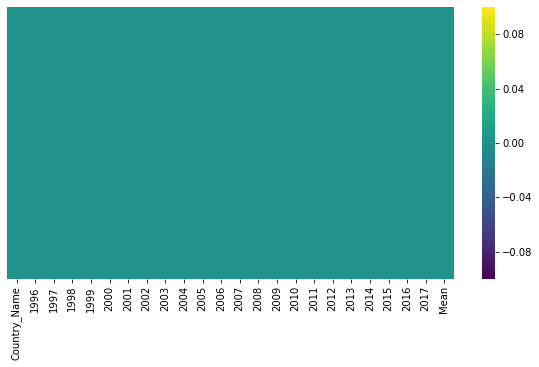

In [24]:
# Checking for null values
print(df_data_pop.isnull().sum())

#Plotting heat map representing null values if any
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(df_data_pop.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

Now df_data_pop data is cleaned. We will proceed further

In [25]:
df_data_pop_v2=df_data_pop.iloc[:,:-1]
df_data_pop_v2.columns

Index(['Country_Name', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [26]:
#Setting Country_Name as index
df_data_pop_v2=df_data_pop_v2.set_index('Country_Name')
df_data_pop_v2 = df_data_pop_v2.T
df_data_pop_v2.head()


Country_Name  Afghanistan       Albania     Algeria  Andorra      Angola  \
1996           19000000.0  2.916667e+06  29000000.0  76091.6  23250000.0   
1997           19000000.0  2.916667e+06  30000000.0  64327.0  23250000.0   
1998           20000000.0  2.916667e+06  30000000.0  64142.0  23250000.0   
1999           20000000.0  2.916667e+06  31000000.0  64370.0  23250000.0   
2000           21000000.0  2.916667e+06  31000000.0  65390.0  23250000.0   

Country_Name  Antigua and Barbuda   Argentina    Armenia    Aruba   Australia  \
1996                      70173.0  35000000.0  3200000.0  83200.0  18000000.0   
1997                      71704.0  36000000.0  3100000.0  85451.0  19000000.0   
1998                      73224.0  36000000.0  3100000.0  87277.0  19000000.0   
1999                      74674.0  36000000.0  3100000.0  89005.0  19000000.0   
2000                      76016.0  37000000.0  3100000.0  90853.0  19000000.0   

Country_Name  ...  United Arab Emirates  United Kingdom  United States  \
1996          ...             2500000.0      58000000.0    270000000.0   
1997          ...             2700000.0      58000000.0    270000000.0   
1998          ...             2800000.0      58000000.0    280000000.0   
1999          ...             3000000.0      59000000.0    280000000.0   
2000          ...             3100000.0      59000000.0    280000000.0   

Country_Name    Uruguay  Uzbekistan  Venezuela, RB     Vietnam  Yemen, Rep.  \
1996          3200000.0  28000000.0     22000000.0  76000000.0   19000000.0   
1997          3300000.0  28000000.0     23000000.0  77000000.0   19000000.0   
1998          3300000.0  28000000.0     23000000.0  78000000.0   19000000.0   
1999          3300000.0  24000000.0     24000000.0  79000000.0   19000000.0   
2000          3300000.0  28000000.0     24000000.0  80000000.0   19000000.0   

Country_Name      Zambia    Zimbabwe  
1996           9300000.0  12000000.0  
1997           9600000.0  12000000.0  
1998           9900000.0  12000000.0  
1999          10000000.0  12000000.0  
2000          10000000.0  12000000.0  

[5 rows x 160 columns]

In [27]:
#Plotting population increase in plotly 
fig = go.Figure()
for i in range(df_data_pop_v2.shape[1]):
               fig.add_trace(go.Scatter(x=df_data_pop_v2.index, y=df_data_pop_v2[df_data_pop_v2.columns[i]], name=df_data_pop_v2.columns[i]))
fig.update_layout(title_text='Increase in population across places from different economies')
fig.show()



## Analysis 3:  What are the categories(Series.Topic) and different indicators it contains and carrying out in excel file

In [28]:
df_series=df_series.rename(columns = {'Indicator Name':'Indicator_Name'})
df_series.columns

Index(['Series Code', 'Topic', 'Indicator_Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type'],
      dtype='object')

In [29]:
#carrying unique values from Topic columns of  df_series into dictionary with keys as unique topic and values as corresponding 
list_topic=list(df_series.Topic.unique())
dict_topic={}

for i in range(len(list_topic)):
    list_temp_IN=[]
    for j in range(df_series.shape[0]):
        if df_series.Topic[j]==list_topic[i]:
            list_temp_IN.append(df_series.Indicator_Name[j])            
    dict_topic[list_topic[i]] = list_temp_IN
    list_temp_IN
     

#creating dataframe out of dictionary
df_series_topic=pd.DataFrame.from_dict(dict_topic, orient='index')

df_series_topic= df_series_topic.T
df_series_topic

# Create a Pandas ExcelWriter using XlsxWriter as the engine.
writer = pd.ExcelWriter('df_series_topic.xlsx', engine='xlsxwriter')
df_series_topic.to_excel(writer, sheet_name='Sheet1')
writer.save()


## Analysis 4:Carrying out average of bank returns on assets and equity ( before tax and after tax) an represent it in box plot

In [30]:
#Creatng lists
list_BR_asset_BT=[]                                    #temporary list to carry out list of indicator name which matches string1
list_BR_asset_AT=[]
list_BR_equity_BT=[]
list_BR_equity_AT=[]

#creating 4 strings that carry bank return indicator name 
string1='Bank return on assets (%, before tax)'
string2='Bank return on assets (%, after tax)'
string3='Bank return on equity (%, before tax)'
string4='Bank return on equity (%, after tax)'

# carrying out rows that contains bank return as indicator name
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string1:
        list_BR_asset_BT.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string1])
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string2:
        list_BR_asset_AT.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string2])
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string3:
        list_BR_equity_BT.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string3])
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string4:
        list_BR_equity_AT.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string4])

            
#creating dataframes for above bank return lists
df_BR_asset_BT=pd.DataFrame(list_BR_asset_BT[0])
df_BR_asset_BT=df_BR_asset_BT.reset_index(drop=True)

df_BR_asset_AT=pd.DataFrame(list_BR_asset_AT[0])
df_BR_asset_AT=df_BR_asset_AT.reset_index(drop=True)

df_BR_equity_BT=pd.DataFrame(list_BR_equity_BT[0])
df_BR_equity_BT=df_BR_equity_BT.reset_index(drop=True)

df_BR_equity_AT=pd.DataFrame(list_BR_equity_AT[0])
df_BR_equity_AT=df_BR_equity_AT.reset_index(drop=True)


In [31]:
#Checking for null values in df_BR_asset_BT
#print("Total NaN in df_BR_asset_BT" , df_BR_asset_BT.isnull().sum().sum(), sep='\n') 
#print("***Count NaN in each column of a df_BR_asset_BT***")
#print("Nan in each columns in df_BR_asset_BT" , df_BR_asset_BT.isnull().sum(), sep='\n')
#print("***Count NaN in each row of a df_BR_asset_BT***")
#for i in range(len(df_BR_asset_BT.index)) :
    #print("Nan in row ", i , " : " ,  df_BR_asset_BT.iloc[i].isnull().sum())


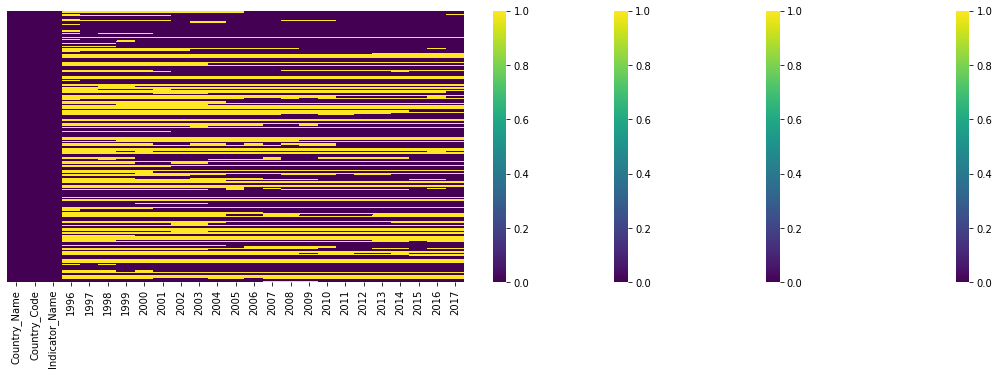

In [32]:
#checking null values
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_BR_asset_BT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_asset_AT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_equity_BT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_equity_AT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [33]:
#Carrying mean values in df_BR_asset_BT and filling null values with mean value.
df_BR_asset_BT['Mean']=df_BR_asset_BT[df_BR_asset_BT.columns[range(3,25)]].mean(axis=1)
list_mean=[]
list_mean=list(df_BR_asset_BT['Mean'])
#Filling null values with corresponding mean values row wise
for i in range(df_BR_asset_BT.shape[0]):
    df_BR_asset_BT.iloc[i]=df_BR_asset_BT.iloc[i].fillna(list_mean[i])

In [34]:
#Carrying mean values in df_BR_asset_AT and filling null values with mean value.
df_BR_asset_AT['Mean']=df_BR_asset_AT[df_BR_asset_AT.columns[range(3,25)]].mean(axis=1)
list_mean=[]
list_mean=list(df_BR_asset_AT['Mean'])
#Filling null values with corresponding mean values row wise
for i in range(df_BR_asset_AT.shape[0]):
    df_BR_asset_AT.iloc[i]=df_BR_asset_AT.iloc[i].fillna(list_mean[i])

In [35]:
#Carrying mean values in df_BR_asset_BT and filling null values with mean value.
df_BR_equity_BT['Mean']=df_BR_equity_BT[df_BR_equity_BT.columns[range(3,25)]].mean(axis=1)
list_mean=[]
list_mean=list(df_BR_equity_BT['Mean'])
#Filling null values with corresponding mean values row wise
for i in range(df_BR_equity_BT.shape[0]):
    df_BR_equity_BT.iloc[i]=df_BR_equity_BT.iloc[i].fillna(list_mean[i])

In [36]:
#Carrying mean values in df_BR_asset_BT and filling null values with mean value.
df_BR_equity_AT['Mean']=df_BR_equity_AT[df_BR_equity_AT.columns[range(3,25)]].mean(axis=1)
list_mean=[]
list_mean=list(df_BR_equity_AT['Mean'])
#Filling null values with corresponding mean values row wise
for i in range(df_BR_equity_AT.shape[0]):
    df_BR_equity_AT.iloc[i]=df_BR_equity_AT.iloc[i].fillna(list_mean[i])

In [37]:
#Dropping rows
temp_li=df_BR_asset_BT.columns[range(3,25)]
df_BR_asset_BT=df_BR_asset_BT.dropna(how='all',subset=temp_li)
df_BR_asset_AT=df_BR_asset_AT.dropna(how='all',subset=temp_li)
df_BR_equity_BT=df_BR_equity_BT.dropna(how='all',subset=temp_li)
df_BR_equity_AT=df_BR_equity_AT.dropna(how='all',subset=temp_li)

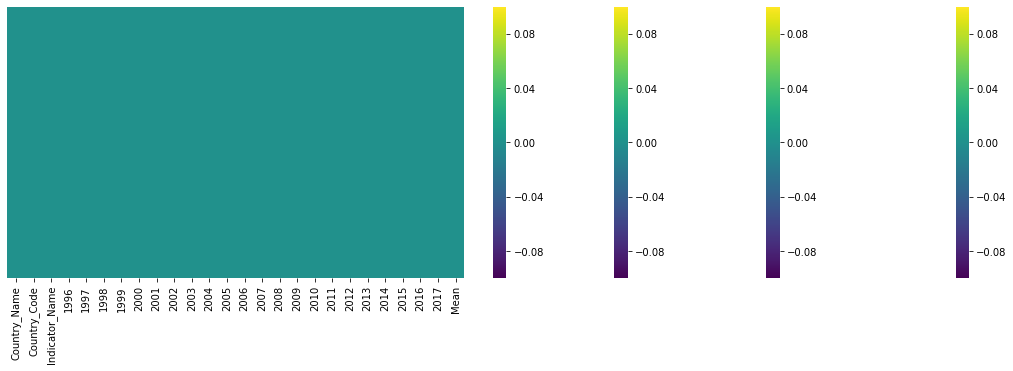

In [38]:
#checking null values
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_BR_asset_BT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_asset_AT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_equity_BT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)
sns.heatmap(df_BR_equity_AT.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [39]:
#Appending all bank return on asset dataset in one dataframe
df_asset = df_BR_asset_BT[['Country_Name','Mean']]
df_BR_asset_AT=df_BR_asset_AT[df_BR_asset_AT['Country_Name'].isin(df_asset['Country_Name'])]
df_BR_asset_AT=df_BR_asset_AT.reset_index(drop=True)
df_asset=df_asset.reset_index(drop=True)
list_mean_asset=[]
for i in range(df_asset.shape[0]):
    if df_BR_asset_AT.Country_Name[i] in list(df_asset.Country_Name):
        list_mean_asset.append(list(df_BR_asset_AT.loc[df_BR_asset_AT.Country_Name == df_asset.Country_Name[i]].iloc[:,-1]))
list_mean_asset=[item for sublist in list_mean_asset for item in sublist]
df_asset['Mean_asset_AT']=list_mean_asset
#print(df_asset)

In [40]:
#plotting in bar plotly 
import plotly.graph_objects as go
x = df_asset
fig = go.Figure()
fig.add_trace(go.Bar(x=x.Country_Name, y=x.Mean,name="Before Tax",marker_color='indianred'))
fig.add_trace(go.Bar(x=x.Country_Name, y=x.Mean_asset_AT,name="After Tax",marker_color='lightsalmon'))
fig.update_layout(barmode='relative', title_text='Bank return on assets - before and after tax',autosize=False,width=5000,height=600)
fig.show()

In [41]:
#Appending all bank return on equity dataset in one dataframe
df_equity = df_BR_equity_BT[['Country_Name','Mean']]
df_BR_equity_AT=df_BR_equity_AT[df_BR_equity_AT['Country_Name'].isin(df_equity['Country_Name'])]
df_BR_equity_AT=df_BR_equity_AT.reset_index(drop=True)
df_equity=df_equity.reset_index(drop=True)
list_mean_equity=[]
for i in range(df_equity.shape[0]):
    if df_BR_equity_AT.Country_Name[i] in list(df_equity.Country_Name):
        list_mean_equity.append(list(df_BR_equity_AT.loc[df_BR_equity_AT.Country_Name == df_equity.Country_Name[i]].iloc[:,-1]))
list_mean_equity=[item for sublist in list_mean_equity for item in sublist]
df_equity['Mean_equity_AT']=list_mean_equity
#print(df_equity)

In [42]:
#plotting in bar plotly 
import plotly.graph_objects as go
x = df_equity
fig = go.Figure()
fig.add_trace(go.Bar(x=x.Country_Name, y=x.Mean,name="Before Tax"))
fig.add_trace(go.Bar(x=x.Country_Name, y=x.Mean_equity_AT,name="After Tax"))
fig.update_layout(barmode='relative', title_text='Bank return on equity - before and after tax',autosize=False,width=5000,height=600)
fig.show()

## Analysis 5: Top 5 economic countries that has the highest GDP market prices and represent it in timeseries.

In [43]:
#Creatng lists
list_GDP=[]                                    #temporary list to carry out list of indicator name which matches string1
string_GDP='GDP at market prices (current US$)'

# carrying out rows that contains GDP as indicator name
for j in range(df_data_v1.shape[0]):
    if df_data_v1.Indicator_Name[j]==string_GDP:
        list_GDP.append(df_data_v1.loc[df_data_v1['Indicator_Name'] == string_GDP])

#creating dataframes for GDP lists
df_GDP=pd.DataFrame(list_GDP[0])
df_GDP=df_GDP.reset_index(drop=True)
df_GDP.shape

(214, 25)

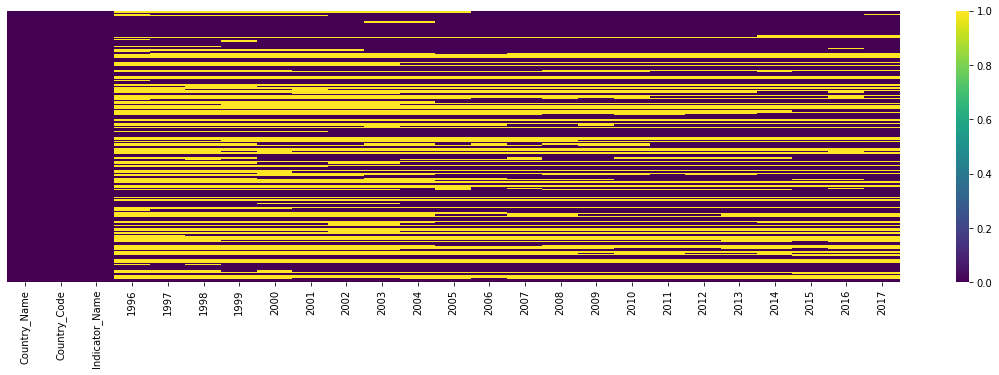

In [44]:
#checking null values
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_GDP.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [45]:
#Dropping rows
temp_li=df_GDP.columns[range(3,25)]
df_GDP=df_GDP.dropna(how='all',subset=temp_li)



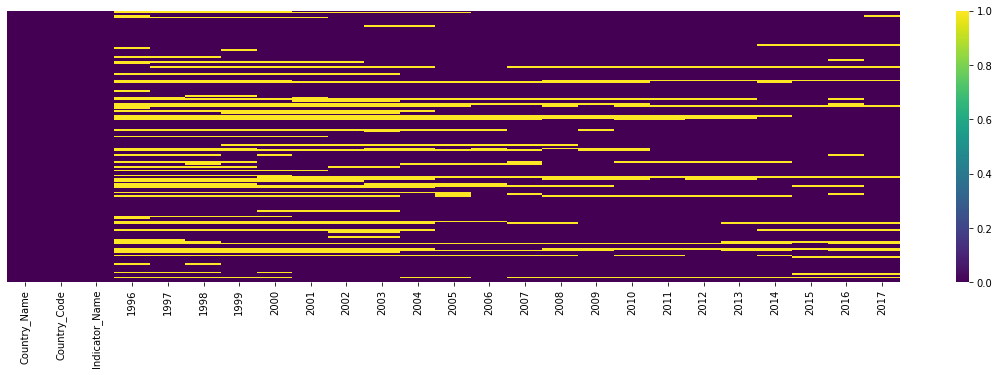

In [46]:
#checking null values
fig,ax  = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_GDP.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [47]:
#Carrying mean values in df_GDP and filling null values with mean value.
df_GDP['Mean']=df_GDP[df_GDP.columns[range(3,25)]].mean(axis=1)
list_GDP_mean=[]
list_GDP_mean=list(df_GDP['Mean'])
#Filling null values with corresponding mean values row wise
for i in range(df_GDP.shape[0]):
    df_GDP.iloc[i]=df_GDP.iloc[i].fillna(list_GDP_mean[i])

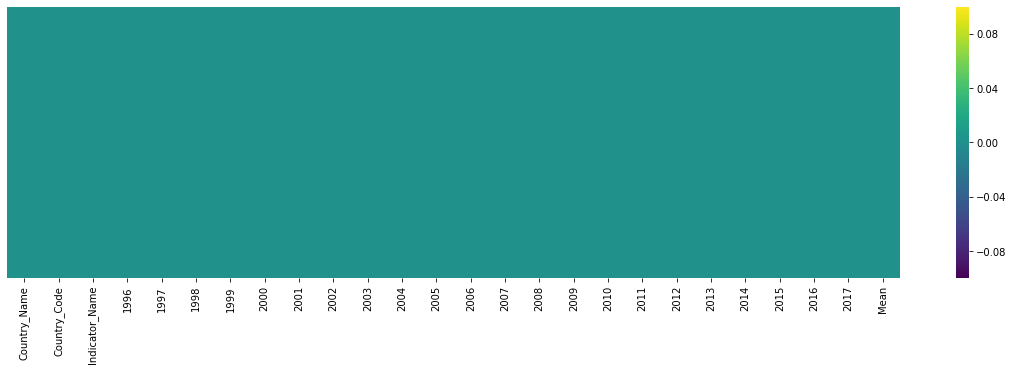

In [48]:
#checking null values
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(df_GDP.isnull(),yticklabels=False,cbar=True,cmap='viridis', ax=ax)

In [49]:
#Top 5 economic countries that has the highest GDP market prices
df_GDP=df_GDP.nlargest(5,list(df_GDP.columns[3:25]), keep='all')
#Dropping columns Country_code and Indicator_Name
df_GDP=df_GDP.drop(['Country_Code','Indicator_Name','Mean'], axis=1)
df_GDP.columns
#Setting Country_Name as index
df_GDP=df_GDP.set_index('Country_Name')
df_GDP = df_GDP.T
df_GDP.head()


Country_Name  United States         Japan       Germany        France  \
1996           8.100000e+12  4.800000e+12  2.500000e+12  1.600000e+12   
1997           8.600000e+12  4.400000e+12  2.200000e+12  1.500000e+12   
1998           9.100000e+12  4.000000e+12  2.200000e+12  1.500000e+12   
1999           9.600000e+12  4.600000e+12  2.200000e+12  1.500000e+12   
2000           1.000000e+13  4.900000e+12  1.900000e+12  1.400000e+12   

Country_Name  United Kingdom  
1996            1.400000e+12  
1997            1.600000e+12  
1998            1.600000e+12  
1999            1.700000e+12  
2000            1.600000e+12

In [50]:
#Plotting population increase in plotly 
fig = go.Figure()
for i in range(df_GDP.shape[1]):
               fig.add_trace(go.Scatter(x=df_GDP.index, y=df_GDP[df_GDP.columns[i]], name=df_GDP.columns[i]))
fig.update_layout(title="Top 5 economic countries that has the highest GDP market prices")
fig.show()


# Conclusions

### Minimum and Maximum gross income in all economies and represent it in matplotlib.basemap.

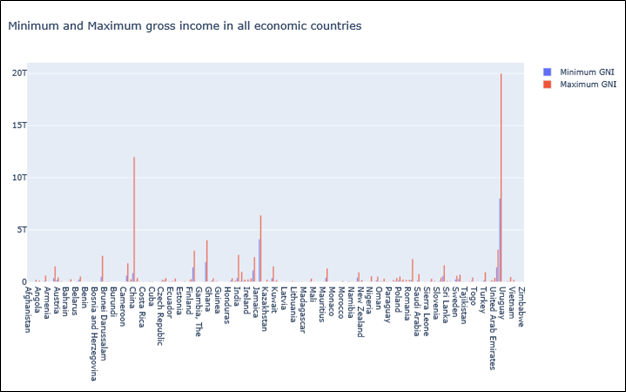

It seems "United States" has the maximum average gross income and "Cabo Verde" amongst all economic countries.

Plot on basemap-

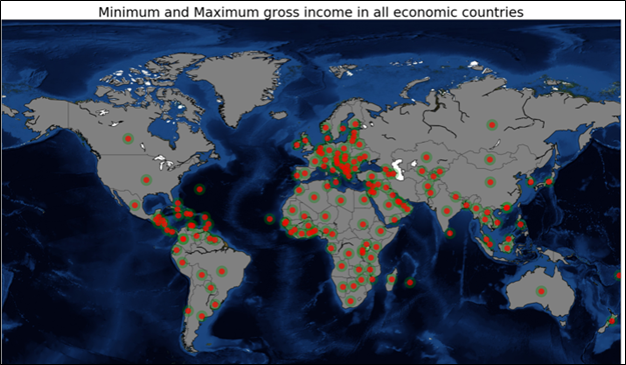

### Increase in population across places from different economies and represent it in plotly timeseries.


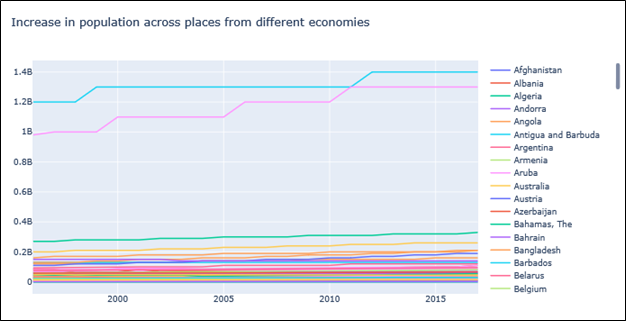

From the plot, we can see country which has maximum increase in population is “China”. And, then “India” has second largest increase in population.
For the rest of the countries, we cannot see much of difference in population increase over the years.



### What are the categories (Series.Topic) and different indicators it contains and represent it tree map.

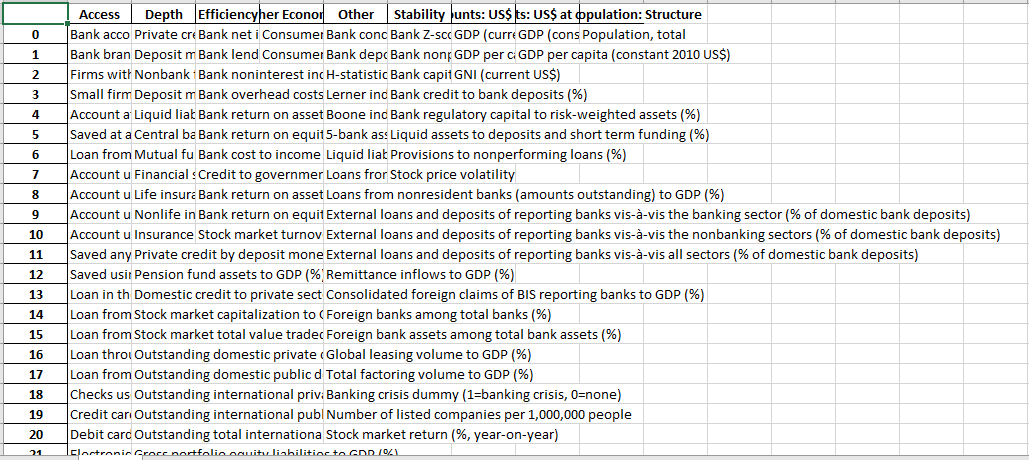


### Carry out Bank return on assets and equity (before and after tax) for and represent it in stacked bar graph.

Bank return on assets - before and after tax-

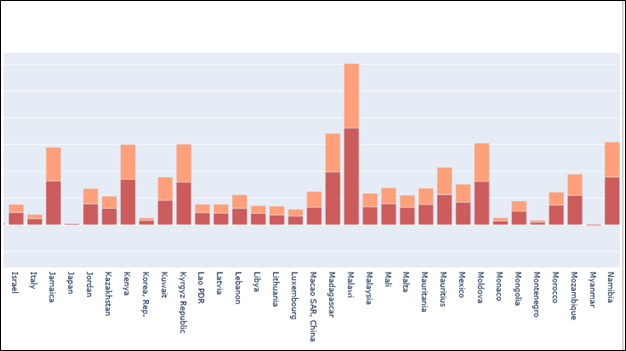

It seems from the plot that “Malawi” has the highest value for bank return on assets (before and after tax)

Bank return on Equity - before and after tax-

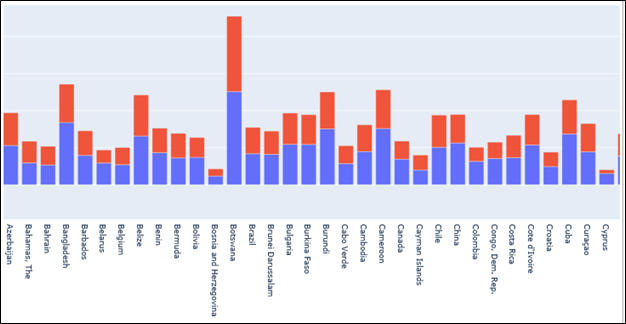


It seems from the plot that “Botswana” has the highest value for bank return on assets (before and after tax)

### Top 5 economic countries that has the highest GDP market prices and represent it in timeseries.

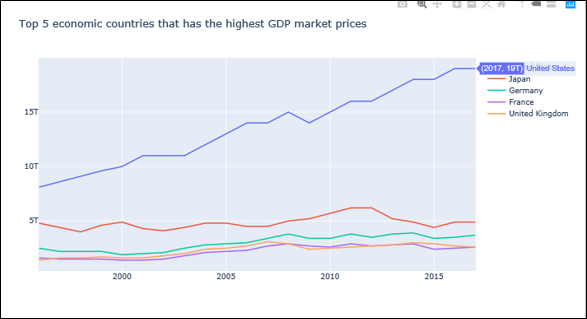

From the plot, it seems “United States” has the highest GDP market price in 2017.